# Predicting Demand for Tech Jobs in Canada
#### CSCI 4050U – Final Project  
**Group Members:** Akshayan Balathas, Ryan Warrener, Ayaan Yousaf    
**Date:** December 8, 2025

--- 

## Introduction

In this project, we forecast labour demand for jobs in the Canadian technology sector (NAICS 54 - Professional, scientific, and technical services) using historical data from **Statistics Canada (StatCan)**. We use monthly job vacancy data from the Job Vacancy and Wage Survey (JVWS), which provides data from 2015 to 2025. Using this data, we train an LSTM neural network to learn patterns and predict future demand for tech jobs in Canada.

Dataset: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410040601

## Loading the Dataset
- NOTE: This dataset shows job vacancies for previous years in Canada for tech jobs. So our goal is to train the LSTM to learn this dataset and predict future demand. This is just 1 dataset I found though, we can optimize it further by adding more datasets for input features if we need to.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/target.csv", skiprows=7, nrows=2, header=1)
df

,North American Industry Classification System (NAICS) 3,Statistics,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,...,December 2024,January 2025,February 2025,March 2025,April 2025,May 2025,June 2025,July 2025,August 2025,September 2025
0,"Professional, scientific and technical service...",NaN,Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Job vacancies 4,F,"22,980","21,995","22,740","20,110","22,895","23,110","23,020",...,"36,465","35,225","37,925","39,520","37,785","35,990","35,575","38,035","36,245","36,960"


---

## Preprocessing and Cleaning

In [3]:
# Extract job vacancy row (target variable)
vacancies_row = df.iloc[1]

# Only keep monthly values
vacancies_values = vacancies_row[3:]

# Create job vacancies DataFrame
vac_df = pd.DataFrame({
    'Month': vacancies_values.index,
    'Job Vacancies': vacancies_values.values
})

# Clean values and convert to numerical data (float)
vac_df['Job Vacancies'] = (
    vac_df['Job Vacancies']
    .astype(str)
    .str.replace(',', '')
    .str.extract(r"(\d+\.?\d*)")
    .astype(float)
)

# Format Month column and set as index
vac_df['Month'] = pd.to_datetime(vac_df['Month'])
vac_df = vac_df.sort_values('Month').set_index('Month')

# Handle NaN values using time-based linear interpolation
vac_df['Job Vacancies'] = vac_df['Job Vacancies'].interpolate(method='time')

vac_df.head()


C:\Users\Ayaan\AppData\Local\Temp\ipykernel_16728\1889748287.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vac_df['Month'] = pd.to_datetime(vac_df['Month'])


,Job Vacancies
Month,
2015-05-01,22980.0
2015-06-01,21995.0
2015-07-01,22740.0
2015-08-01,20110.0
2015-09-01,22895.0


---

## Exploratory Data Analysis (EDA)
TODO: 
- Plot the data (job vacancies vs. month)
- Describe any patterns/trends we can see
- Note the spikes (vacancies should spike during COVID around early 2021)
  
Before building the LSTM model, we will visualize the historical trend of job vacancies in Canada's tech sector. Plotting the data will allow us to confirm that the data represents meaningful patterns and long-term trends. It is important we understand the trends before training our model, which will aim to predict the data for the future.

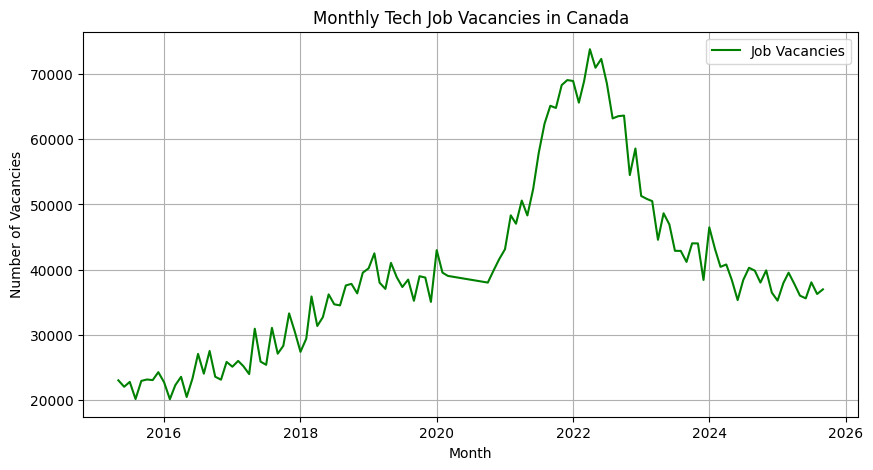

In [8]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 5))

plt.plot(vac_df.index, vac_df['Job Vacancies'], color='green', label='Job Vacancies')
plt.title('Monthly Tech Job Vacancies in Canada')

plt.xlabel('Month')
plt.ylabel('Number of Vacancies')

plt.grid(True)
plt.legend()
plt.show()

### Analysis
The plot of job vacancies above shows a few clear patterns we can analyze: 

- **Upward Trend**: Overall, the data shows an upward trend in tech job demand, meaning there is increasingly more demand for tech jobs.
- **Post-COVID Spike**: The graph shows a massive surge in tech job vacancies following the COVID-19 pandemic. This suggests that demand for tech jobs was at an all-time high during this period, and slowly normalized to where it is at today. From 2021-2023, the demand for digital workers likely surged due to the effects of the pandemic.

After the surge in 2021-2023, job vacancies dropped significantly, going back to normal. These results reflect the constant need for workers in the tech industry.

---

## Build the LSTM Neural Network
TODO: 
1. Scale the data for LSTM to values between 0 and 1 for activation functions
2. Then define the sequences so the LSTM can learn
3. Split dataset into training and testing
   1. Maybe we can do 70/30 or 80/20 split for training/testing
4. Set up the model architecture
   1. Using PyTorch nn.LSTM

### Scaling

In [5]:
import torch

---

## Training the Model
TODO: 
1. Training loop
2. Compute the loss (MSE?)
3. Adam optimizer
4. Forward pass
5. Backprop

In [6]:
### Training loop here

---

## Evaluating the Model
TODO: 
1. Test the model on the testing part of the dataset
2. Compare expected outputs vs. model predictions
3. Maybe plot some comparisons so it's clear
4. Compute errors (MSE)
5. Analyze results

In [7]:
### Evaluation code here

---

## Deployment
- Might be a separate file not sure yet, could probably put it in here.

---

## Conclusion
...